In [ ]:
import numpy as np
from Bio import PDB

# Define amino acid charges at physiological pH
amino_acid_charges = {
    'ASP': -1, 'GLU': -1, 'ARG': 1, 'LYS': 1, 'HIS': 0.1,
    'CYS': 0, 'TYR': 0, 'ASN': 0, 'GLN': 0, 'SER': 0, 'THR': 0,
    'ALA': 0, 'VAL': 0, 'ILE': 0, 'LEU': 0, 'MET': 0, 'PHE': 0,
    'TRP': 0, 'PRO': 0, 'GLY': 0, 'OTHER': 0
}

# List of residue positions to analyze
residues = [
    4, 24, 47, 48, 52, 54, 60, 74, 87, 99, 102, 104,
    107, 139, 142, 143, 144, 177, 178, 181
]

# Electrostatic energy calculation using Coulomb's Law
def coulomb_energy(q1, q2, r, dielectric=80):
    k = 8.9875e9  # Coulomb constant (N·m²/C²)
    if r == 0:
        return float('inf')  # Avoid division by zero
    return (k * q1 * q2) / (dielectric * r)

# Function to parse PDB and compute electrostatics
def calculate_electrostatics(pdb_file, chain_id='X'):
    parser = PDB.PDBParser(QUIET=True)
    structure = parser.get_structure("protein", pdb_file)
    model = structure[0]  # Use first model (single structure case)

    # Check all residues in chain X and print
    print("Checking residues in chain X...")
    for chain in model:
        if chain.id == chain_id:  # Check only the specified chain
            for res in chain:
                print(f"Residue: {res.id[1]} - {res.resname}")

    # Check for the presence of Cα atoms in the specified residues
    print("\nChecking for Cα atoms in residues...")
    for chain in model:
        if chain.id == chain_id:
            for res in chain:
                atoms = [atom.name for atom in res]
                if 'CA' not in atoms:
                    print(f"Residue {res.id[1]} ({res.resname}) does not have a Cα atom.")
                else:
                    print(f"Residue {res.id[1]} ({res.resname}) has a Cα atom.")

    # Extract Cα coordinates for specified residues
    residue_info = {}
    for chain in model:
        if chain.id == chain_id:
            for res in chain:
                if res.id[1] in residues and res.resname in amino_acid_charges:
                    ca_atom = res['CA'] if 'CA' in res else None
                    if ca_atom:
                        residue_info[res.id[1]] = (res.resname, ca_atom.coord)

    if not residue_info:
        print("Error: No matching residues found in the PDB file.")
        return

    print(f"\nExtracted {len(residue_info)} residues:")
    for res, (name, coord) in residue_info.items():
        print(f"  Residue {res}: {name}, Coord: {coord}")

    # Compute pairwise electrostatic interactions
    energies = {res: 0 for res in residue_info}  # Initialize energy storage
    for i, (res1, (aa1, coord1)) in enumerate(residue_info.items()):
        for res2, (aa2, coord2) in list(residue_info.items())[i+1:]:
            distance = np.linalg.norm(coord1 - coord2)  # Compute Euclidean distance
            q1, q2 = amino_acid_charges.get(aa1, 0), amino_acid_charges.get(aa2, 0)
            energy = coulomb_energy(q1, q2, distance)  # Electrostatic energy

            energies[res1] += energy
            energies[res2] += energy

    if all(e == 0 for e in energies.values()):
        print("Warning: All electrostatic energy values are zero.")

    # Print results
    print(f"\n{'Residue':<8} {'Amino Acid':<12} {'Total Energy (kJ/mol)':<20}")
    print("=" * 40)
    for res, energy in energies.items():
        print(f"{res:<8} {residue_info[res][0]:<12} {energy:<20.3e}")

    # Prepare data for plotting
    amino_acids = [residue_info[res][0] for res in energies]
    energy_values = [energies[res] for res in energies]

    # Debugging print before plotting
    print(f"\nPlotting {len(amino_acids)} amino acids with energies: {energy_values}")

    # Plot results
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10, 5))
    plt.plot(amino_acids, energy_values, marker='o', linestyle='-', color='b', label="Electrostatic Energy")
    plt.xlabel("Amino Acid")
    plt.ylabel("Total Electrostatic Energy (kJ/mol)")
    plt.title("Electrostatic Energy per Residue")
    plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)  # Zero energy reference line
    plt.grid(True)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.legend()
    plt.show()

# Example usage
pdb_file = "/home/hp/nayanika/github/GPX6/prep_structures/original_mousecys.pdb"  # Replace with your actual PDB file
calculate_electrostatics(pdb_file, chain_id='X')



\documentclass{article}
\usepackage{amsmath}
\usepackage{graphicx}
\begin{document}
\begin{table}[ht]
    \centering
    \begin{tabular}{|c|c|c|c|c|}
    \hline
    Mutant & Charge Diff (dq) & Free Energy Diff (|dg*)|dg0| & Combined Metric (Charge + Free Energy) \\
    \hline
    Cys & 1.27 & 76.15 & 77.42 \\ 
    Sec C49U & 1.19 & 80.17 & 81.36 \\ 
    F48Y & 0.89 & 72.96 & 73.85 \\ 

    \hline
    \end{tabular}
    \caption{Combined RESP Charge Differences and Free Energy Changes for Mutants}
\end{table}
\end{document}



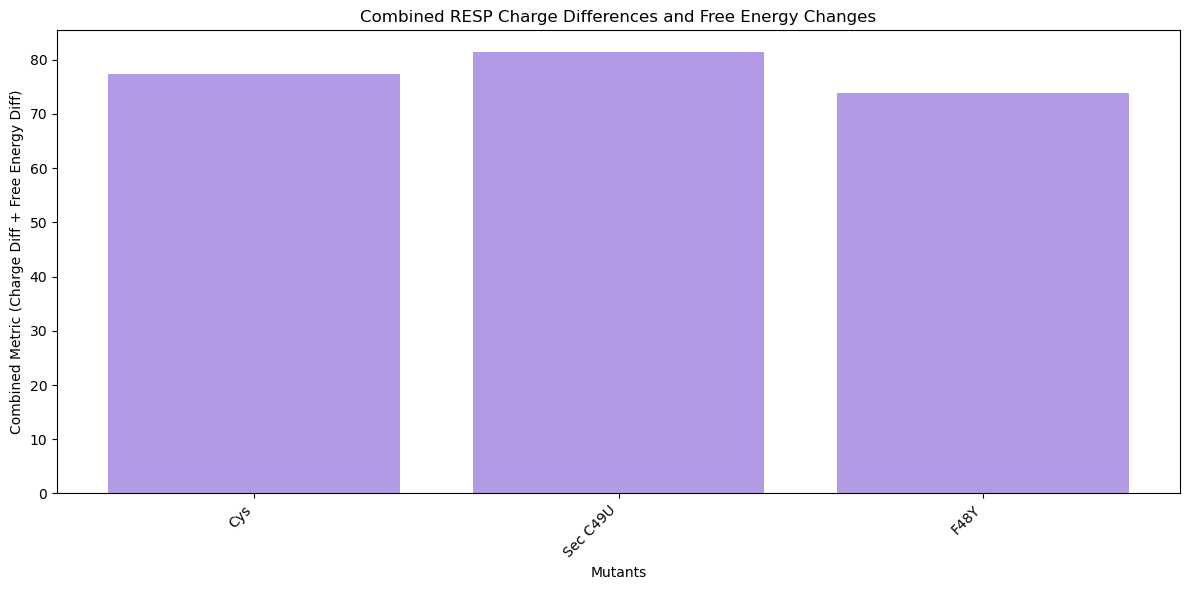

In [10]:
import matplotlib.pyplot as plt

# Example RESP charges for each mutant (using your data format)
charges_data = {
    "Cys": {
        "49.SG": {"charge_st_1": -0.335, "charge_st_2": -0.9, "dq": -0.565},
        "49.HG1": {"charge_st_1": 0.155, "charge_st_2": 0.418, "dq": 0.263},
        "49.CB": {"charge_st_1": 0.06, "charge_st_2": -0.3, "dq": -0.36},
        "49.HB1": {"charge_st_1": 0.06, "charge_st_2": 0.1, "dq": 0.04},
        "49.HB2": {"charge_st_1": 0.06, "charge_st_2": 0.1, "dq": 0.04},
        "49.CA": {"charge_st_1": 0.14, "charge_st_2": 0.14, "dq": 0.0},
        "49.HA": {"charge_st_1": 0.06, "charge_st_2": 0.06, "dq": 0.0},
        "49.N": {"charge_st_1": -0.5, "charge_st_2": -0.5, "dq": 0.0},
        "49.HN": {"charge_st_1": 0.3, "charge_st_2": 0.3, "dq": 0.0},
        # Add other atoms for this mutant...
    },
    "Sec C49U": {
        "49.SG": {"charge_st_1": -0.335, "charge_st_2": -0.9, "dq": -0.565},
        "49.HG1": {"charge_st_1": 0.155, "charge_st_2": 0.418, "dq": 0.263},
        "49.CB": {"charge_st_1": 0.06, "charge_st_2": -0.3, "dq": -0.36},
        # Add other atoms for this mutant...
    },
    "F48Y": {
        "49.SG": {"charge_st_1": -0.3, "charge_st_2": -0.7, "dq": -0.4},
        "49.HG1": {"charge_st_1": 0.1, "charge_st_2": 0.3, "dq": 0.2},
        "49.CB": {"charge_st_1": 0.05, "charge_st_2": -0.2, "dq": -0.25},
        "49.HB1": {"charge_st_1": 0.06, "charge_st_2": 0.1, "dq": 0.04},
        # Add other atoms for this mutant...
    },
    # Add other mutants...
}

# Example free energy data for each mutant
free_energy_data = {
    "Cys": {"dg_star": 20.72, "dg_zero": -55.43},
    "Sec C49U": {"dg_star": 15.75, "dg_zero": -64.42},
    "F48Y": {"dg_star": 20.25, "dg_zero": -52.71},
    "S47A": {"dg_star": 17.38, "dg_zero": -56.04},
    "T52A": {"dg_star": 20.08, "dg_zero": -48.75},
    "C99R": {"dg_star": 17.74, "dg_zero": -49.28},
    "Q54T": {"dg_star": 20.30, "dg_zero": -56.15},
    "H144Q": {"dg_star": 22.42, "dg_zero": -56.18},
    "H177Q": {"dg_star": 21.33, "dg_zero": -55.91},
    "G74A": {"dg_star": 20.78, "dg_zero": -54.45},
    "T178A": {"dg_star": 19.80, "dg_zero": -56.16},
    "E143S": {"dg_star": 22.77, "dg_zero": -60.43},
    "K87T": {"dg_star": 20.70, "dg_zero": -63.43},
    "P142S": {"dg_star": 20.45, "dg_zero": -60.33},
    "Y104F": {"dg_star": 19.45, "dg_zero": -62.83},
    "G102S": {"dg_star": 22.89, "dg_zero": -56.43},
    "I24L": {"dg_star": 17.85, "dg_zero": -61.05},
    "R181S": {"dg_star": 24.20, "dg_zero": -50.04},
    "S4R": {"dg_star": 22.52, "dg_zero": -55.30},
    "T60A": {"dg_star": 23.91, "dg_zero": -60.53},
    "N107S": {"dg_star": 19.84, "dg_zero": -63.57},
}

# Combine RESP charges and free energy changes
combined_data = {}

# For each mutant, compute combined data
for mutant, energy_values in free_energy_data.items():
    # Ensure that the mutant has RESP charge data
    if mutant in charges_data:
        # Get charge differences for the mutant from charges_data
        dq_sum = sum(abs(atom_info['dq']) for atom_info in charges_data[mutant].values())
        
        # Calculate free energy difference (e.g., |dg_star - dg_zero|)
        dg_diff = abs(energy_values["dg_star"] - energy_values["dg_zero"])
        
        # Combine the two metrics: Here we'll just add them for simplicity
        combined_data[mutant] = {"charge_diff": dq_sum, "free_energy_diff": dg_diff}

# Generate LaTeX table
latex_table = """
\\documentclass{article}
\\usepackage{amsmath}
\\usepackage{graphicx}
\\begin{document}
\\begin{table}[ht]
    \\centering
    \\begin{tabular}{|c|c|c|c|c|}
    \\hline
    Mutant & Charge Diff (dq) & Free Energy Diff (|dg*)|dg0| & Combined Metric (Charge + Free Energy) \\\\
    \\hline
"""

for mutant, values in combined_data.items():
    charge_diff = values["charge_diff"]
    free_energy_diff = values["free_energy_diff"]
    combined_metric = charge_diff + free_energy_diff
    latex_table += f"    {mutant} & {charge_diff:.2f} & {free_energy_diff:.2f} & {combined_metric:.2f} \\\\ \n"

latex_table += """
    \\hline
    \\end{tabular}
    \\caption{Combined RESP Charge Differences and Free Energy Changes for Mutants}
\\end{table}
\\end{document}
"""

# Output the LaTeX table
print(latex_table)

# Optional: Plot the combined values
def plot_combined_values(combined_data):
    mutants = list(combined_data.keys())
    combined_values = [values["charge_diff"] + values["free_energy_diff"] for values in combined_data.values()]
    
    plt.figure(figsize=(12, 6))
    plt.bar(mutants, combined_values, color='mediumpurple', alpha=0.7)
    plt.xlabel('Mutants')
    plt.ylabel('Combined Metric (Charge Diff + Free Energy Diff)')
    plt.xticks(rotation=45, ha='right')
    plt.title('Combined RESP Charge Differences and Free Energy Changes')
    plt.tight_layout()
    plt.show()

# Plot the combined values
plot_combined_values(combined_data)
